#  Install package

In [11]:
# ! pip install pyvis
# ! pip install networkx

# Import package

In [12]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
import openai
from IPython.display import display, HTML, Code
from IPython.display import clear_output

# Define Solution class
Please run the following cell to define the functions

In [13]:
import LLM_Geo_Constants as constants
import helper

from LLM_Geo_kernel import Solution

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [14]:
# # Case 4: Hospital_accessibility
# task_name ='Hospital_accessibility'
# TASK = r'''
# For each zipcode area in South Carolina (SC), calculate the distance from the centroid of the zipcode area to its nearest hospital, and then create a choropleth distance map of zipcode area polygons (unit: km), also show the hospital.
# '''

# DATA_LOCATIONS = [
# r"SC zipcode boundary shapefile: https://github.com/GIBDUSC/test/raw/master/sc_zip_boundary.zip, the map projection is WGS1984.",
# r"SC hospitals:  https://github.com/gladcolor/spatial_data/raw/master/South_Carolina/SC_hospitals_with_emergency_room_cleaned.csv, location columns: longitude in 'POINT_X' column, latitude in 'POINT_Y' column.",          
# ]


## Case 5: Census API
# task_name ='Census_API'
# TASK = r''' Show the spatial distribution of the county level median income in the contigous US. Set figure size to (25,15)
# '''

# DATA_LOCATIONS = [
#       "You can use the Census API.",
# ]


# DATA_LOCATIONS = [
# '''Census API key: ae7be70727932dd6aed257692de3f344365d0678'''              
# ]


# # Case 1: population living near hazardous wastes

# task_name ='Resident_at_risk_counting'

# TASK = r"""1) Find out the total population that lives within a tract that contain hazardous waste facilities. The study area is North Carolina, US.
# 2) Generate a map to show the spatial distribution of population at the tract level and highlight the borders of tracts that have hazardous waste facilities.
# """

# DATA_LOCATIONS = ["NC hazardous waste facility ESRI shape file location: https://github.com/gladcolor/LLM- Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip.",
#                   "NC tract boundary shapefile location: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip. The tract id column is 'Tract'.",
#                   "NC tract population CSV file location: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv. The population is stored in 'TotalPopulation' column. The tract ID column is 'GEOID'."
#                  ]





# # Case 3: COVID-19 prevalence trend
# task_name ='COVID_death_rate'
# TASK = r'''1) Draw a map to show the death rate (death/case) of COVID-19 among the countiguous US counties. Use the accumulated COVID-19 data of 2020.12.31 to compute the death rate. Use scheme ='quantiles' when plotting the map.  Set map projection to 'Conus Albers'. Set map size to 15*10 inches.  
# 2) Draw a scatter plot to show the correlation and trend line of the death rate with the senior resident rate, including the r-square and p-value. Set data point transparency to 50%, regression line as red.  Set figure size to 15*10 inches.  
# '''


# DATA_LOCATIONS = [
#                   r"COVID-19 data case in 2020 (county-level): https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv. This data is for daily accumulated COVID cases and deaths for each county in the US. There are 5 columns: date (format: 2021-02-01), county, state, fips, cases, deaths. ",   
#                   r"Contiguous US county boundary (ESRI shapefile): https://github.com/gladcolor/spatial_data/raw/master/contiguous_counties.zip. The county FIPS column is 'GEOID'. ",
#                   r"Census data (ACS2020): https://raw.githubusercontent.com/gladcolor/spatial_data/master/Demography/ACS2020_5year_county.csv. THe needed columns are: 'FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'. Drop rows with NaN cells after loading the used columns.",
#                  ]


# Case 2: France_mobility_changes_2020
task_name ='France_mobility_changes_2020'
TASK = r'''
1) Show the 2020 human mobility monthly change rates of each administrative regions in a France choropleth map. Each month is a sub-map in a map matrix，12 months in total. All monthly maps need to use the same colorbar range (color scheme: coolwarm). The base of the change rate is January 2020. 
2) Draw a line chart to show the monthly change rate trends of all administrative regeions. Each region is a line (the region name is the legend), the x-axis is 2020 months.
'''

DATA_LOCATIONS = ["ESRI shapefile for France administrative regions:" + \
                  "https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip. " + \
                  "The 'GID_1' column is the administrative region code, 'NAME_1' column is the administrative region name.",
                  "REST API url with parameters for daily human mobility data access:" + \
                  "http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020." + \
                  "The response is in CSV format. There are three columns in the response: " + \
                  "place,date (format:2020-01-07), and intra_movement. 'place' column is the administractive region code of every country;" + \
                  "codes for France administrative regions start with 'FRA'. Use the total intra_movement of the month as the montly mobility.",
                 ]



save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
model=r"gpt-4"
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional Geo-information scientist and developer good at Python. 

Your task: Generate a graph (data structure) only, whose nodes are (1) a series of consecutive steps and (2) data to solve this question:  
 
1) Show the 2020 human mobility monthly change rates of each administrative regions in a France choropleth map. Each month is a sub-map in a map matrix，12 months in total. All monthly maps need to use the same colorbar range (color scheme: coolwarm). The base of the change rate is January 2020. 
2) Draw a line chart to show the monthly change rate trends of all administrative regeions. Each region is a line (the region name is the legend), the x-axis is 2020 months.
 

Your reply needs to meet these requirements: 
 1. Think step by step.
2. Steps and data (both input and output) form a graph stored in NetworkX. Disconnected components are NOT allowed.
3. Each step is a data process operation: the input can be data paths or variables,

## Get graph code from GPT API

In [15]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# Load France administrative regions shapefile
G.add_node("france_shapefile_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip", description="France administrative regions shapefile URL")
G.add_node("load_france_shapefile", node_type="operation", description="Load France administrative regions shapefile")
G.add_edge("france_shapefile_url", "load_france_shapefile")
G.add_node("france_gdf", node_type="data", description="France administrative regions GeoDataFrame")
G.add_edge("load_france_shapefile", "france_gdf")

# Load human mobility data
G.add_node("mobility_data_url", node_type="data", data_path="http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020", description="REST API URL for daily human mobility data")
G.add_node("load_mobility_data", node_type="operation", description="Load daily human mobility data")
G.add_edge("mobility_data_url", "load_mobility_data")
G.add_node("mobility_df", node_type="data", description="Human mobility DataFrame")
G.add_edge("load_mobility_data", "mobility_df")

# Filter and aggregate human mobility data, calculate change rates
G.add_node("filter_aggregate_calculate_mobility", node_type="operation", description="Filter and aggregate human mobility data for France regions, calculate monthly change rates")
G.add_edge("mobility_df", "filter_aggregate_calculate_mobility")
G.add_edge("france_gdf", "filter_aggregate_calculate_mobility")
G.add_node("mobility_change_rates_df", node_type="data", description="DataFrame of monthly human mobility change rates for France administrative regions")
G.add_edge("filter_aggregate_calculate_mobility", "mobility_change_rates_df")

# Generate choropleth map matrix
G.add_node("gen_choropleth_map_matrix", node_type="operation", description="Generate choropleth map matrix of 2020 human mobility monthly change rates for France administrative regions")
G.add_edge("mobility_change_rates_df", "gen_choropleth_map_matrix")
G.add_edge("france_gdf", "gen_choropleth_map_matrix")
G.add_node("choropleth_map_matrix", node_type="data", description="Choropleth map matrix of 2020 human mobility monthly change rates for France administrative regions")
G.add_edge("gen_choropleth_map_matrix", "choropleth_map_matrix")

# Generate line chart
G.add_node("gen_line_chart", node_type="operation", description="Generate line chart of monthly change rate trends of all France administrative regions")
G.add_edge("mobility_change_rates_df", "gen_line_chart")
G.add_node("line_chart", node_type="data", description="Line chart of monthly change rate trends of all France administrative regions")
G.add_edge("gen_line_chart", "line_chart")

# Write graphML
nx.write_graphml(G, 'E:\\Research\\LLM-Geo\\France_mobility_changes_2020\\France_mobility_changes_2020.graphml')

## Execute code to generate the solution graph

In [16]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

E:\Research\LLM-Geo\France_mobility_changes_2020.html


## Generate prompts and code for operations (functions)

In [17]:
operations = solution.get_LLM_responses_for_operations(review=True)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

def load_france_shapefile(france_shapefile_url='https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip'):
    """
    Description: Load France administrative regions shapefile

    france_shapefile_url: France administrative regions shapefile URL.
    
    """
    
    import geopandas as gpd

    # Load the shapefile as a GeoPandas Geodataframe
    france_gdf = gpd.read_file(france_shapefile_url)
    
    # Return the Geodataframe
    return france_gdf
import pandas as pd
import requests
from io import StringIO

def load_mobility_data(mobility_data_url='http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020'):
    # Description: Load daily human mobility data from REST API
    # mobility_data_url: REST API URL for daily human mobility data

    # Send request to API and receive the response
    response = requests.get(mobility_data_url)

    # Parse the response text into DataFrame
    mobility_df = pd.read_csv(StringIO(response.text))

    return mobility_df
def filter_aggregate_calculate_mobility(france_gdf, mobility_df):
    """
    Description: Filter and aggregate human mobility data for France regions, calculate monthly change rates

    france_gdf: France administrative regions GeoDataFrame
    mobility_df: Human mobility DataFrame

    """

    # Filter the human mobility data for France regions
    france_mobility_df = mobility_df[mobility_df['place'].str.startswith('FRA')].copy()

    # Change the 'date' column to datetime type and create a new column for the month
    france_mobility_df['date'] = pd.to_datetime(france_mobility_df['date'])
    france_mobility_df['month'] = france_mobility_df['date'].dt.to_period('M')

    # Group by place and month, and then calculate the total intra_movement for each month
    france_monthly_movement = france_mobility_df.groupby(['place', 'month'])['intra_movement'].sum().reset_index()

    # Join france_monthly_movement with france_gdf on the 'place' and 'GID_1' columns
    france_gdf['GID_1'] = france_gdf['GID_1'].astype(str)
    france_monthly_movement['place'] = france_monthly_movement['place'].astype(str)
    mobility_change_rates_df = france_gdf.merge(france_monthly_movement, left_on='GID_1', right_on='place')

    # Calculate the monthly change rates from the base of January 2020
    january_movement = mobility_change_rates_df[mobility_change_rates_df['month'] == '2020-01']['intra_movement'].values[0]
    mobility_change_rates_df['change_rate'] = mobility_change_rates_df['intra_movement'] / january_movement - 1

    return mobility_change_rates_df
def gen_choropleth_map_matrix(france_gdf, mobility_change_rates_df):
    """
    Description: Generate choropleth map matrix of 2020 human mobility monthly change rates for France administrative regions

    france_gdf: France administrative regions GeoDataFrame
    mobility_change_rates_df: DataFrame of monthly human mobility change rates for France administrative regions

    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import calendar

    # Prepare a list of months.
    months = [calendar.month_abbr[i] for i in range(1, 13)]

    # Prepare a 3x4 subplots (axes) list for the 12 months.
    fig, axs = plt.subplots(3, 4, figsize=(20, 10))

    # Flatten the 3x4 axes list to make it 1-D.
    axs = axs.flatten()

    # Loop through each month and generate a choropleth map for each month.
    for i, month in enumerate(months):
        # Select the data for the given month.
        monthly_data = mobility_change_rates_df[mobility_change_rates_df['month'] == month]

        # Merge the monthly data with the France GeoDataFrame.
        france_monthly_gdf = france_gdf.merge(monthly_data, how='left', on='GID_1')
        france_monthly_gdf.fillna(0, inplace=True)

        # Generate a choropleth map for the given month.
        france_monthly_gdf.plot(column='change_rate', cmap='coolwarm', linewid

## Generate prompts and code for assembly program

In [18]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=True)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import pandas as pd
import requests
from io import StringIO
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import calendar

def load_france_shapefile(france_shapefile_url='https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip'):
    france_gdf = gpd.read_file(france_shapefile_url)
    return france_gdf

def load_mobility_data(mobility_data_url='http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020'):
    response = requests.get(mobility_data_url)
    mobility_df = pd.read_csv(StringIO(response.text))
    return mobility_df

def filter_aggregate_calculate_mobility(france_gdf, mobility_df):
    france_mobility_df = mobility_df[mobility_df['place'].str.startswith('FRA')].copy()
    france_mobility_df['date'] = pd.to_datetime(france_mobility_df['date'])
    france_mobility_df['month'] = france_mobility_df['date'].dt.to_period('M')

    france_monthly_movement = france_mobility_df.groupby(['place', 'month'])['intra_movement'].sum().reset_index()

    france_gdf['GID_1'] = france_gdf['GID_1'].astype(str)
    france_monthly_movement['place'] = france_monthly_movement['place'].astype(str)
    
    mobility_change_rates_df = france_monthly_movement.merge(france_gdf, left_on='place', right_on='GID_1')

    january_movement = mobility_change_rates_df[mobility_change_rates_df['month'] == '2020-01']
    
    procedure = []
    months = pd.date_range(start="2020-01-01", end="2020-12-31", freq='M').to_period('M')
    for month in months:
        this_month = mobility_change_rates_df[(mobility_change_rates_df['month']== month)]
        monthly_joined = this_month.merge(january_movement, on='place', suffixes=['', '_baseline'])
        monthly_joined['change_rate'] = monthly_joined['intra_movement'] / monthly_joined['intra_movement_baseline'] - 1
        procedure.append(monthly_joined)
    
    return pd.concat(procedure)

def gen_choropleth_map_matrix(france_gdf, mobility_change_rates_df):
    fig, axs = plt.subplots(3, 4, figsize=(20, 15), constrained_layout=True)
    axs = axs.flatten()

    vmax = mobility_change_rates_df['change_rate'].max()
    vmin = mobility_change_rates_df['change_rate'].min()

    for i, ax in enumerate(axs):
        month = i + 1
        data_for_month = mobility_change_rates_df[mobility_change_rates_df['month'] == pd.Period(f'2020-{month:02}')]

        france_gdf['change_rate'] = france_gdf['GID_1'].map(data_for_month.set_index('GID_1')['change_rate'])
        france_gdf.boundary.plot(ax=ax, linewidth=1, color='Black')
        france_gdf.plot(column='change_rate', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)

        ax.set_axis_off()
        ax.set_title(calendar.month_abbr[month])

    plt.savefig('choropleth_map.png', dpi=300)

def gen_line_chart(mobility_change_rates_df):
    pivot_df = mobility_change_rates_df.pivot_table(index='month', columns='NAME_1_y', values='change_rate')

    fig, ax = plt.subplots(figsize=(15, 10))
    pivot_df.plot(ax=ax)
    
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.set_ylabel('Change Rate')
    ax.set_title('Change Rate Trends, by Region (relative to 2020-01)')
    
    plt.legend(loc='upper left')
    line_chart = plt.savefig('line_chart.png')

def assembly_solution():
    france_gdf = load_france_shapefile()
    mobility_df = load_mobility_data()
    mobility_change_rates_df = filter_aggregate_calculate_mobility(france_gdf, mobility_df)
    
    gen_choropleth_map_matrix(france_gdf, mobility_change_rates_df)
    gen_line_chart(mobility_change_rates_df)

assembly_solution()

## Execute assembly code



-------------- Running code (trial # 1/10) --------------


Error_info_str: 
Traceback (most recent call last):
  File "Complete program", line 221, in <module>
    assembly_solution()
  File "Complete program", line 219, in assembly_solution
    gen_line_chart(mobility_change_rates_df)
  File "Complete program", line 200, in gen_line_chart
    pivot_df = mobility_change_rates_df.pivot_table(index='month', columns='NAME_1_y', values='change_rate')
  File "e:\ProgramData\Anaconda3\envs\street_mapping_env\lib\site-packages\pandas\core\frame.py", line 8728, in pivot_table
    return pivot_table(
  File "e:\ProgramData\Anaconda3\envs\street_mapping_env\lib\site-packages\pandas\core\reshape\pivot.py", line 97, in pivot_table
    table = __internal_pivot_table(
  File "e:\ProgramData\Anaconda3\envs\street_mapping_env\lib\site-packages\pandas\core\reshape\pivot.py", line 166, in __internal_pivot_table
    grouped = data.groupby(keys, observed=observed, sort=sort)
  File "e:\ProgramData\Anac

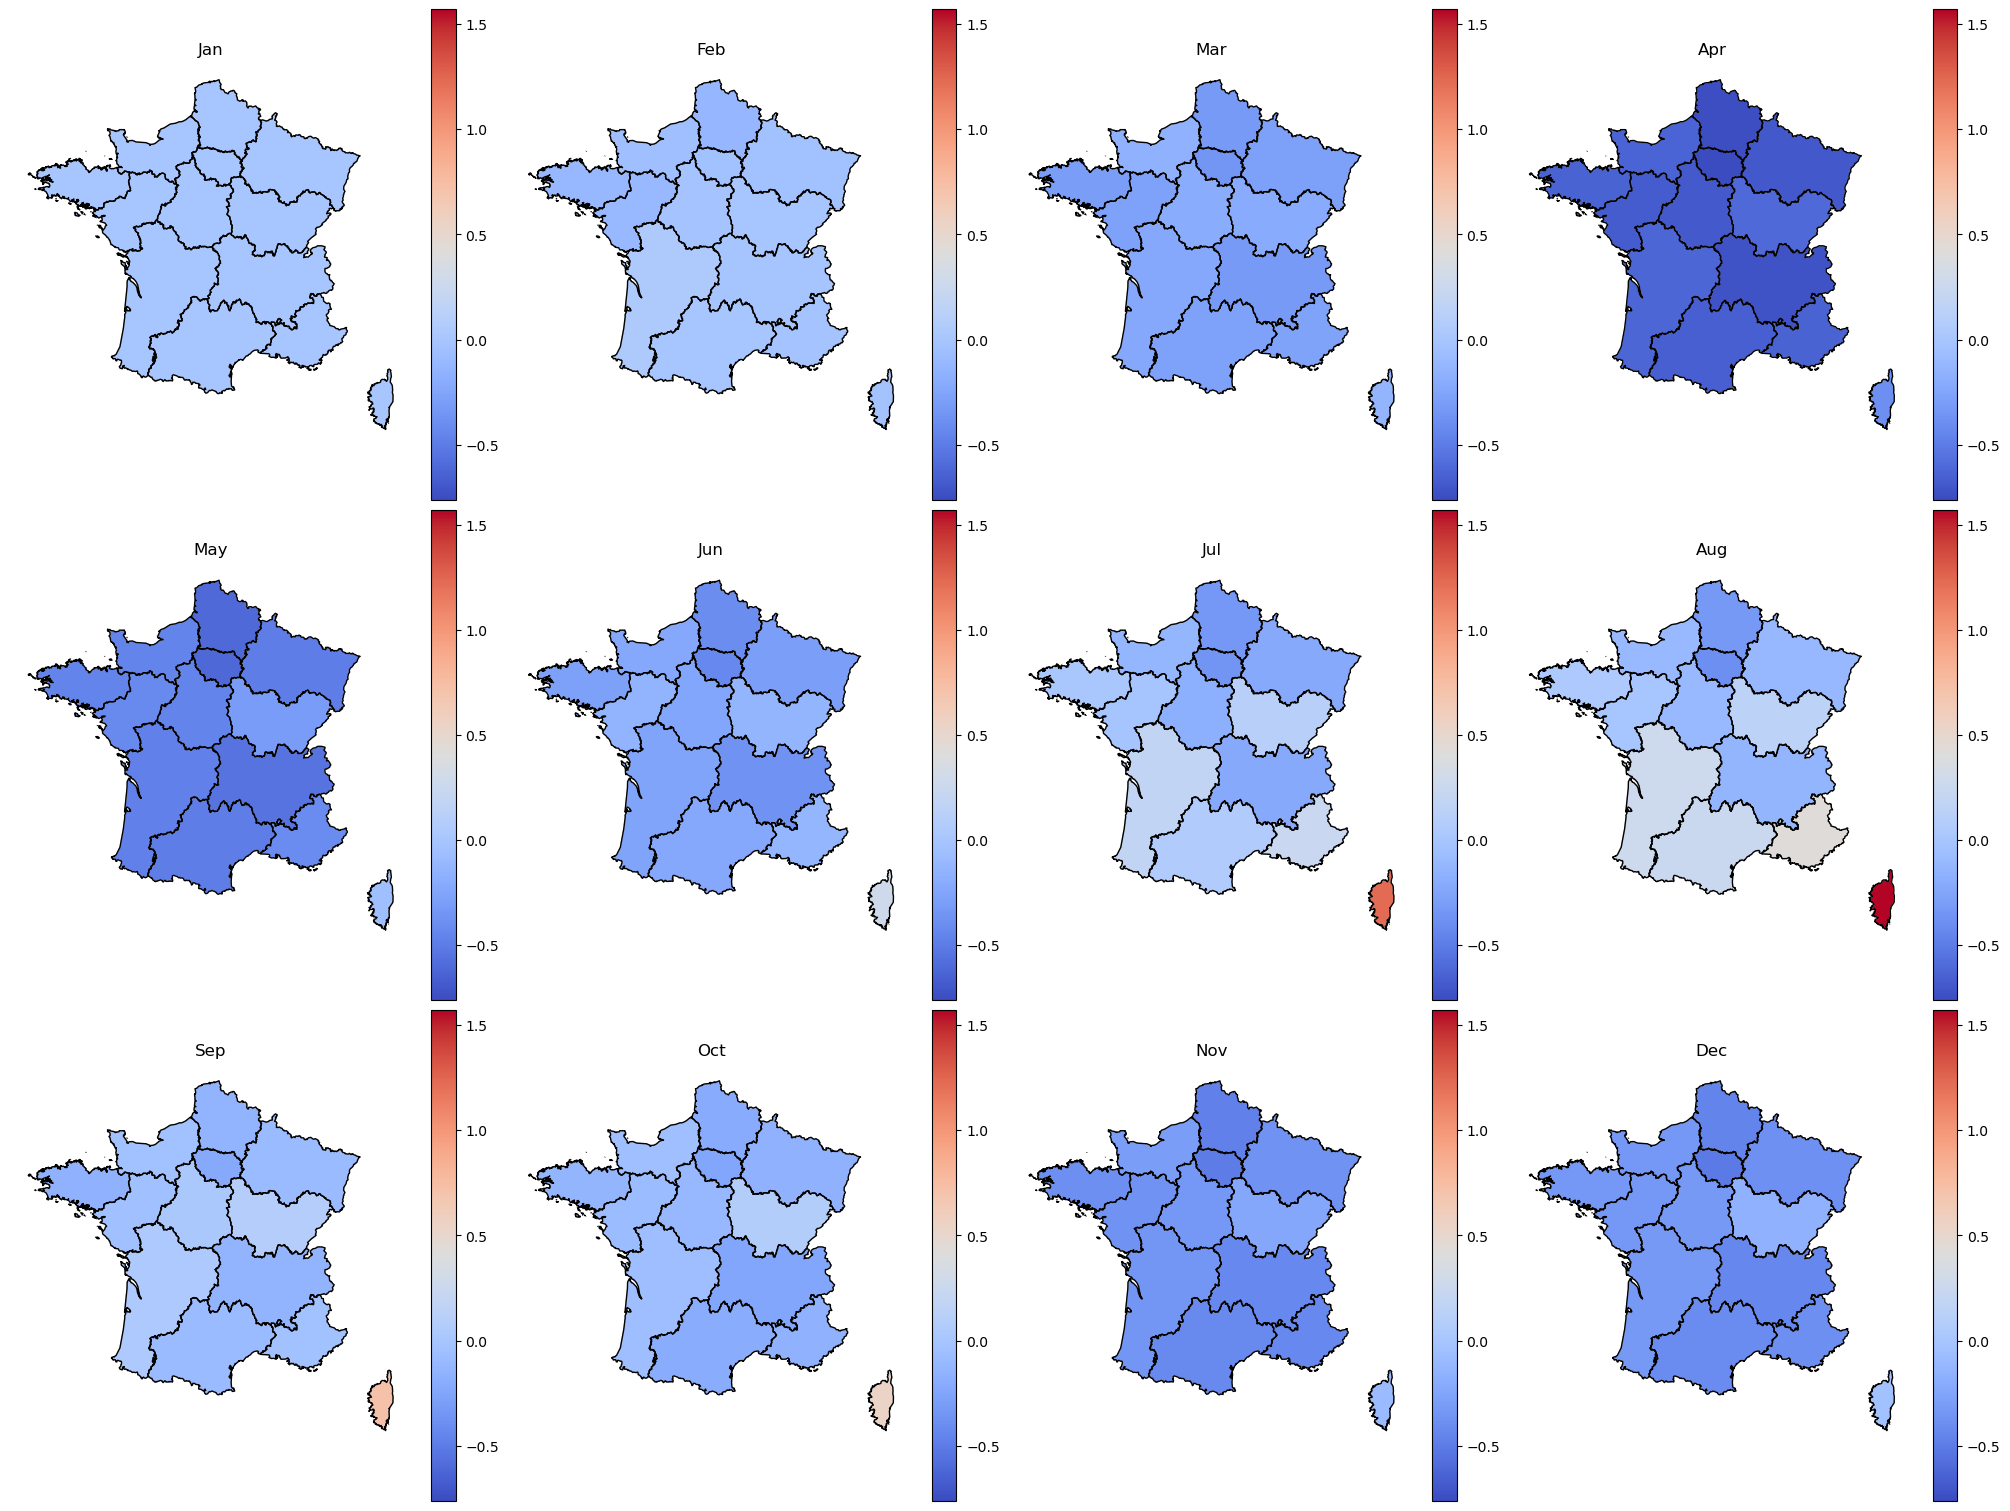

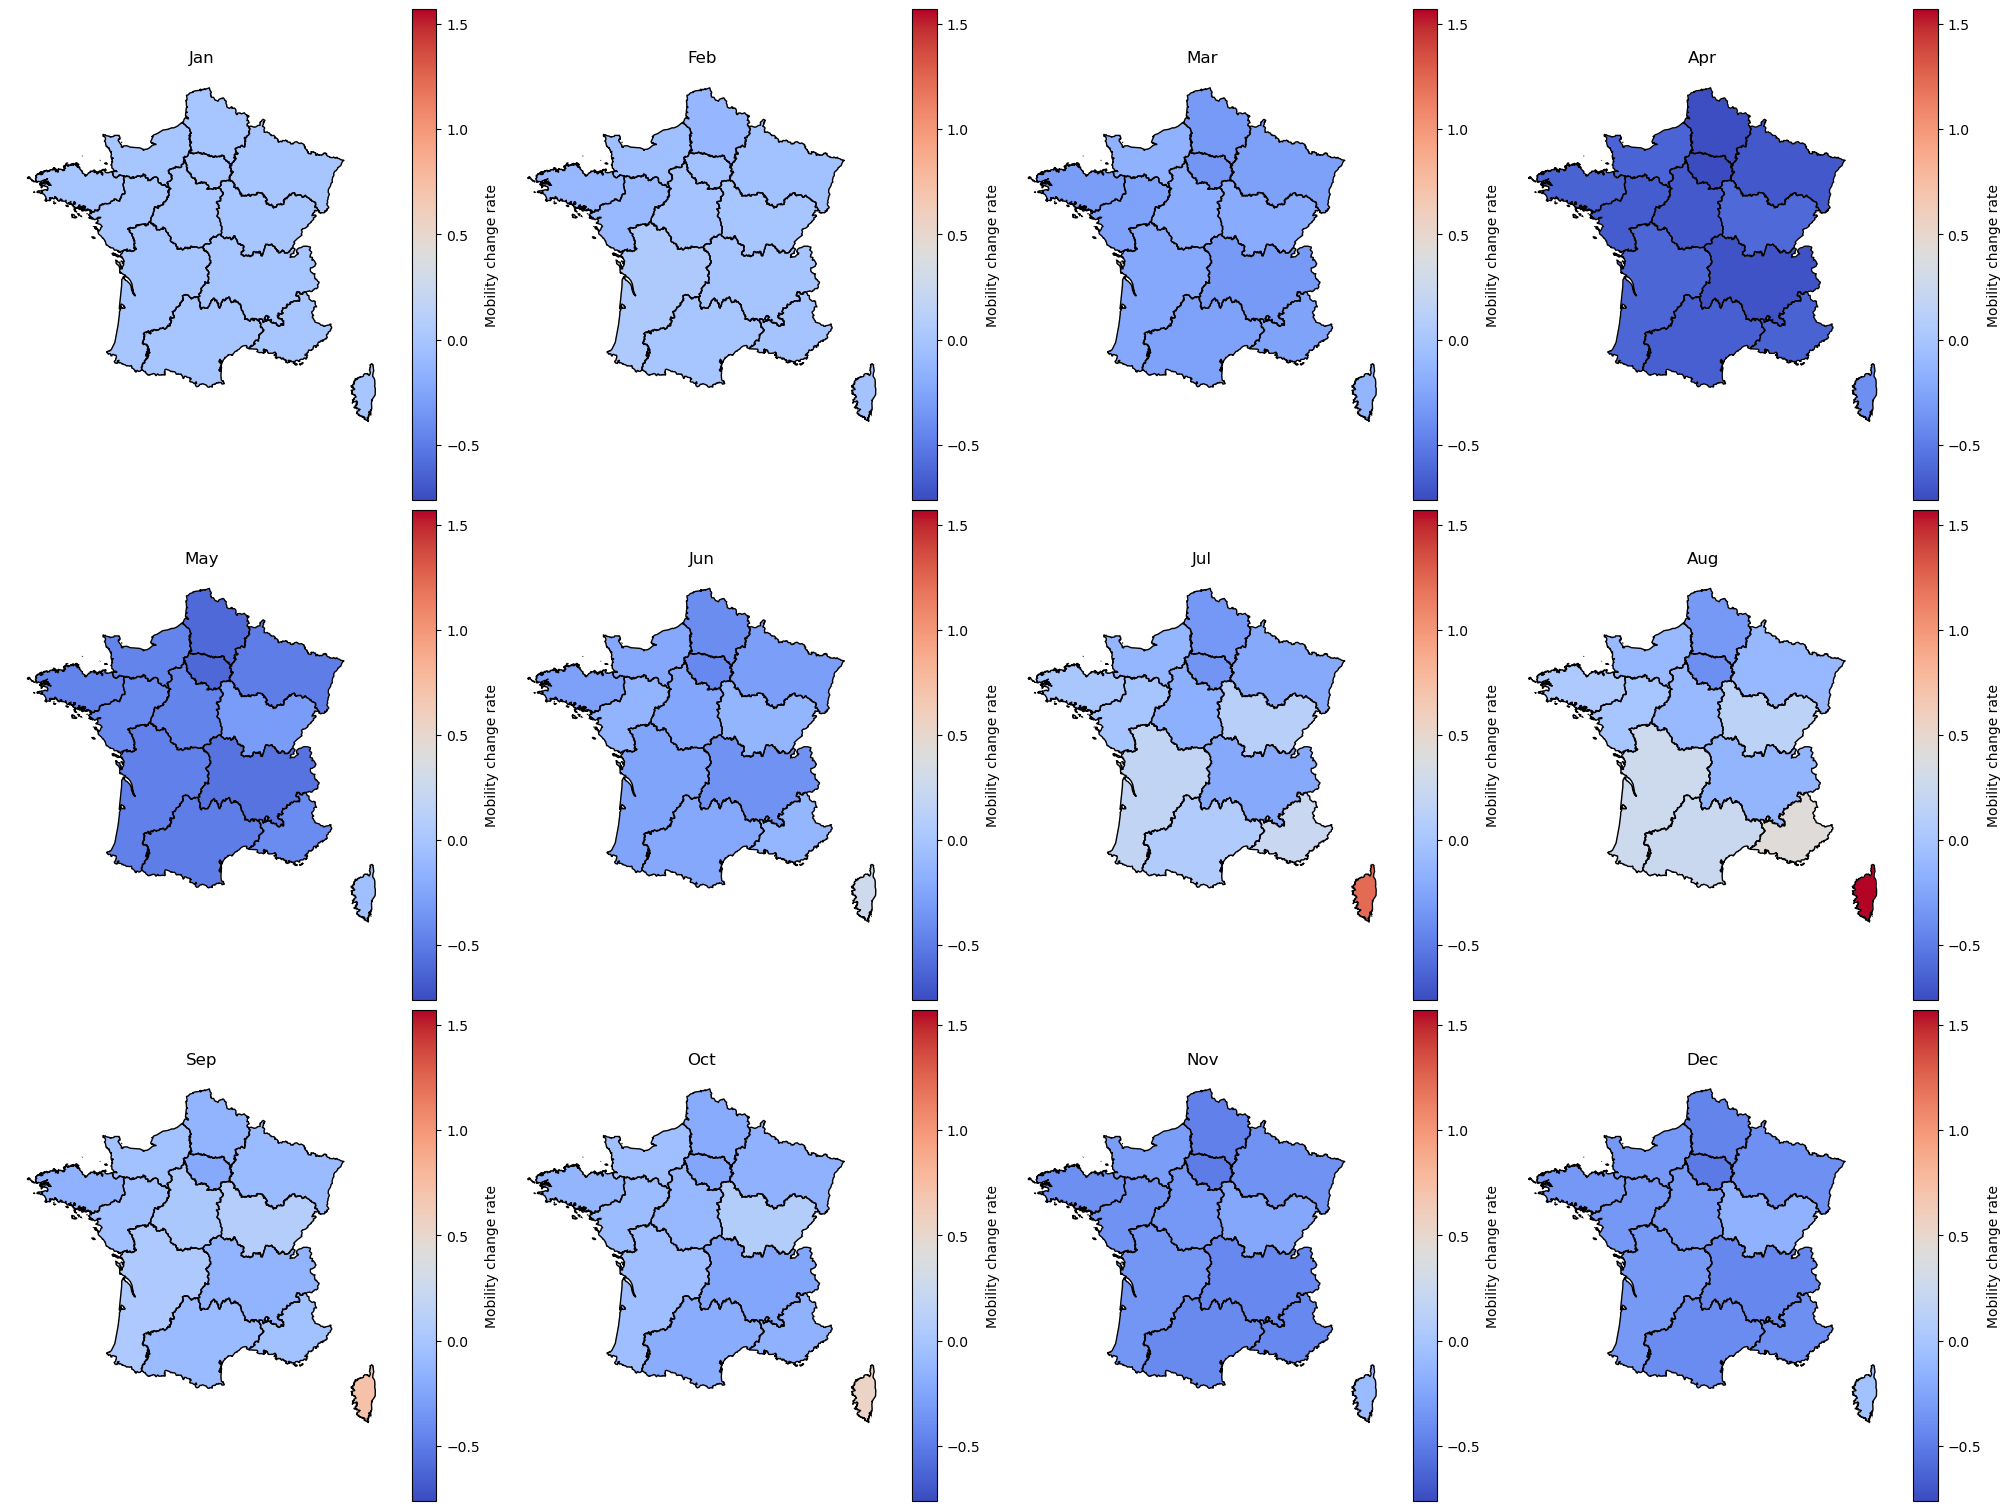

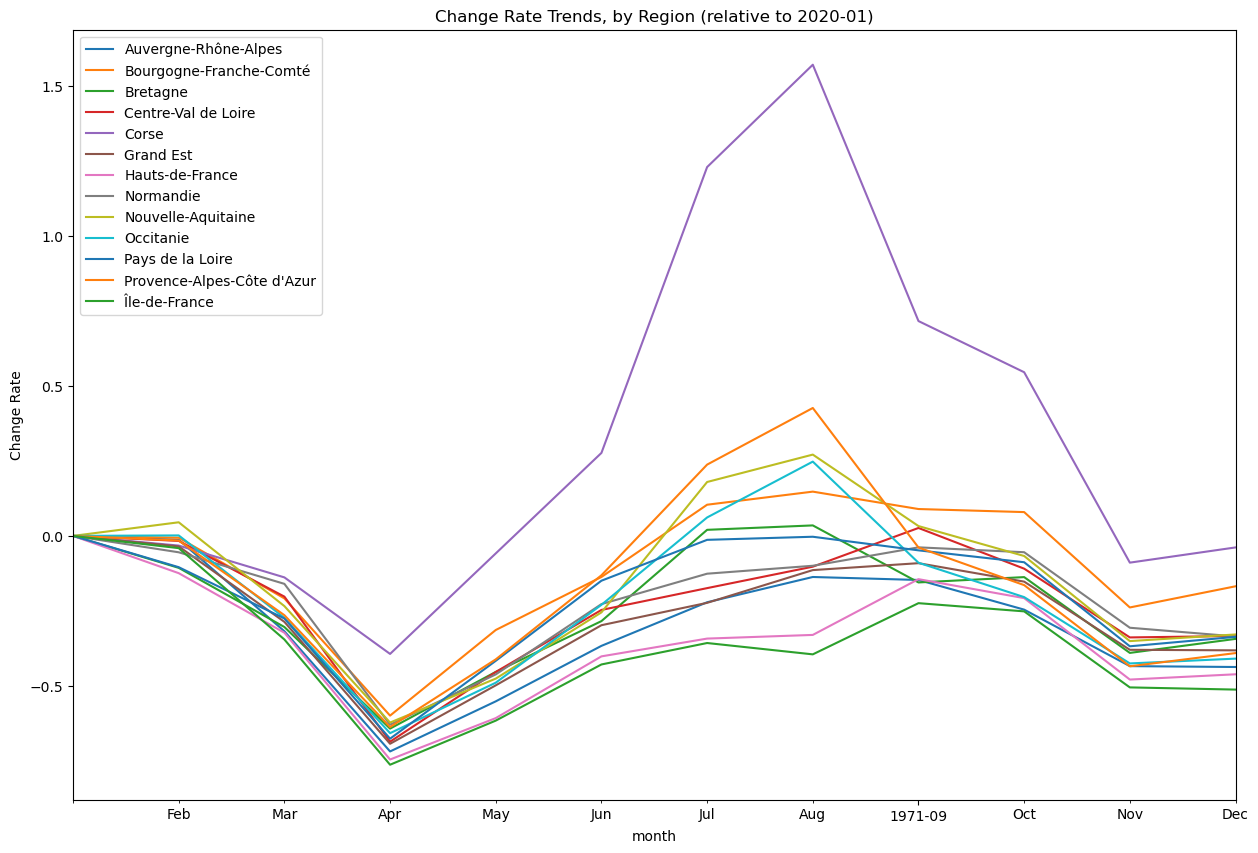

In [19]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))

all_code = solution.execute_complete_program(code=all_code, try_cnt=10)